# **Youtube earnings prediction project**
---

## **Problem Statement**

The success of content creators on YouTube is often associated with various factors such as the number of views, engagement metrics, and the audience's demographics. This project seeks to develop a predictive model that estimates a YouTuber's earnings based on key performance indicators and other relevant factors. The goal is to provide content creators and stakeholders with a tool that offers insights into potential earnings, aiding in strategic decision-making and content optimization.

---


## **Main Objective**
Develop a robust and accurate linear regression model to predict average YouTube earnings for content creators, leveraging key performance indicators and relevant factors, in order to empower content creators with actionable insights for optimizing their content strategy and maximizing revenue on the YouTube platform.

---

### Specific Objectives
1. **Exploratory Data Analysis and Data Pre-Processing:** Perform EDA on the data to better understand the dataset. Clean and preprocess the dataset to handle missing values, outliers, and any other data inconsistencies.
2. **Model Development:** Apply linear regression modeling techniques to establish a relationship between the chosen independent variables and YouTube earnings.
3. **Feature Selection:** Identify and select the most significant independent variables that have a significant impact on earnings. 
4. **Assess Model Perfomance:** Estimate and Interprate the co-efficient of the significant predictor variables
5. **Interpretation of Results:** Interpret the coefficients of the regression model to understand the relative importance of each independent variable in predicting YouTube earnings. Provide insights into the factors that most strongly influence earnings.

---


## **Details on the Data set**

 This meticulously curated dataset unveils the statistics of the most subscribed YouTube channels. A collection of YouTube giants, this dataset offers a perfect avenue to analyze and gain valuable insights from the luminaries of the platform. With comprehensive details on top creators' subscriber counts, video views, upload frequency, country of origin, earnings, and more.



### **Description of columns:**
---
**rank:** Position of the YouTube channel based on the number of subscribers

**Youtuber:** Name of the YouTube channel

**subscribers:** Number of subscribers to the channel

**video views:** Total views across all videos on the channel

**category:** Category or niche of the channel

**Title:** Title of the YouTube channel

**uploads:** Total number of videos uploaded on the channel

**Country:** Country where the YouTube channel originates

**Abbreviation:** Abbreviation of the country

**channel_type:** Type of the YouTube channel (e.g., individual, brand)

**video_views_rank:** Ranking of the channel based on total video views

**country_rank:** Ranking of the channel based on the number of subscribers within its country

**channel_type_rank:** Ranking of the channel based on its type (individual or brand)

**video_views_for_the_last_30_days:** Total video views in the last 30 days

**lowest_monthly_earnings:** Lowest estimated monthly earnings from the channel

**highest_monthly_earnings:** Highest estimated monthly earnings from the channel

**lowest_yearly_earnings:** Lowest estimated yearly earnings from the channel

**highest_yearly_earnings:** Highest estimated yearly earnings from the channel

**subscribers_for_last_30_days:** Number of new subscribers gained in the last 30 days

**created_year:** Year when the YouTube channel was created

**created_month:** Month when the YouTube channel was created

**created_date:** Exact date of the YouTube channel's creation

**Gross tertiary education enrollment (%):** Percentage of the population enrolled in tertiary education in the country

**Population:** Total population of the country

**Unemployment rate:** Unemployment rate in the country

**Urban_population:** Percentage of the population living in urban areas

**Latitude:** Latitude coordinate of the country's location

**Longitude:** Longitude coordinate of the country's location

In [331]:
# Adding necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF




## **Exploratory Data Analysis EDA**

In [332]:
df = pd.read_csv('Global YouTube Statistics (1).csv', encoding='latin-1', index_col=0)

In [333]:
df.head()

,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
rank,,,,,,,,,,,,,,,,,,,,,
1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,1.0,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,4055159.0,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,48.0,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,2.0,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,3.0,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [334]:
df.tail()

,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
rank,,,,,,,,,,,,,,,,,,,,,
991,Natan por Aï¿,12300000,9.029610e+09,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,525.0,...,700000.0,2017.0,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,6141.0,...,300000.0,2018.0,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
993,Panda,12300000,2.214684e+09,NaN,HybridPanda,2452,United Kingdom,GB,Games,129005.0,...,1000.0,2006.0,Sep,11.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973
994,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39,Sweden,SE,Games,35112.0,...,100000.0,2012.0,May,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501
995,Make Joke Of,12300000,2.129774e+09,Comedy,Make Joke Of,62,India,IN,Comedy,4568.0,...,100000.0,2017.0,Aug,1.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [335]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
subscribers,995.0,2.298241e+07,1.752611e+07,1.230000e+07,1.450000e+07,1.770000e+07,2.460000e+07,2.450000e+08
video views,995.0,1.103954e+10,1.411084e+10,0.000000e+00,4.288145e+09,7.760820e+09,1.355470e+10,2.280000e+11
uploads,995.0,9.187126e+03,3.415135e+04,0.000000e+00,1.945000e+02,7.290000e+02,2.667500e+03,3.013080e+05
video_views_rank,994.0,5.542489e+05,1.362782e+06,1.000000e+00,3.230000e+02,9.155000e+02,3.584500e+03,4.057944e+06
country_rank,879.0,3.860535e+02,1.232245e+03,1.000000e+00,1.100000e+01,5.100000e+01,1.230000e+02,7.741000e+03
channel_type_rank,962.0,7.457193e+02,1.944387e+03,1.000000e+00,2.700000e+01,6.550000e+01,1.397500e+02,7.741000e+03
video_views_for_the_last_30_days,939.0,1.756103e+08,4.163782e+08,1.000000e+00,2.013750e+07,6.408500e+07,1.688265e+08,6.589000e+09
lowest_monthly_earnings,995.0,3.688615e+04,7.185872e+04,0.000000e+00,2.700000e+03,1.330000e+04,3.790000e+04,8.509000e+05
highest_monthly_earnings,995.0,5.898078e+05,1.148622e+06,0.000000e+00,4.350000e+04,2.127000e+05,6.068000e+05,1.360000e+07
lowest_yearly_earnings,995.0,4.422574e+05,8.612161e+05,0.000000e+00,3.265000e+04,1.595000e+05,4.551000e+05,1.020000e+07


In [336]:
df.shape

(995, 27)

In [337]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 995 entries, 1 to 995
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Youtuber                                 995 non-null    object 
 1   subscribers                              995 non-null    int64  
 2   video views                              995 non-null    float64
 3   category                                 949 non-null    object 
 4   Title                                    995 non-null    object 
 5   uploads                                  995 non-null    int64  
 6   Country                                  873 non-null    object 
 7   Abbreviation                             873 non-null    object 
 8   channel_type                             965 non-null    object 
 9   video_views_rank                         994 non-null    float64
 10  country_rank                             879 non-null  

In [338]:
# checking null values
df.isnull().sum()

Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month                                5
created_date                                 5
Gross tertiar

In [339]:
df.columns

Index(['Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'Abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

## Data Pre-Processing

In [340]:
# Create a new column 'average_monthly_earnings' with the average of the two earnings columns
df['average_monthly_earnings'] = df[['lowest_monthly_earnings', 'highest_monthly_earnings']].mean(axis=1)

# Drop the original columns if you no longer need them
df = df.drop(['lowest_monthly_earnings', 'highest_monthly_earnings'], axis=1)


# Create a new column 'average_yearly_earnings' with the average of the two earnings columns
df['average_yearly_earnings'] = df[['lowest_yearly_earnings', 'highest_yearly_earnings']].mean(axis=1)

# Drop the original columns if you no longer need them
df = df.drop(['lowest_yearly_earnings', 'highest_yearly_earnings'], axis=1)

# Display the updated DataFrame
df.head()

,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,...,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude,average_monthly_earnings,average_yearly_earnings
rank,,,,,,,,,,,,,,,,,,,,,
1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,1.0,...,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880,4782300.000,57600000.00
2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,4055159.0,...,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,0.025,0.31
3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,48.0,...,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,2868500.000,34350000.00
4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,2.0,...,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,4196900.000,50350000.00
5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,3.0,...,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880,3877950.000,46500000.00


In [341]:
df = df.rename(columns={'video views': 'video_views'})

#### Correlation Matrix

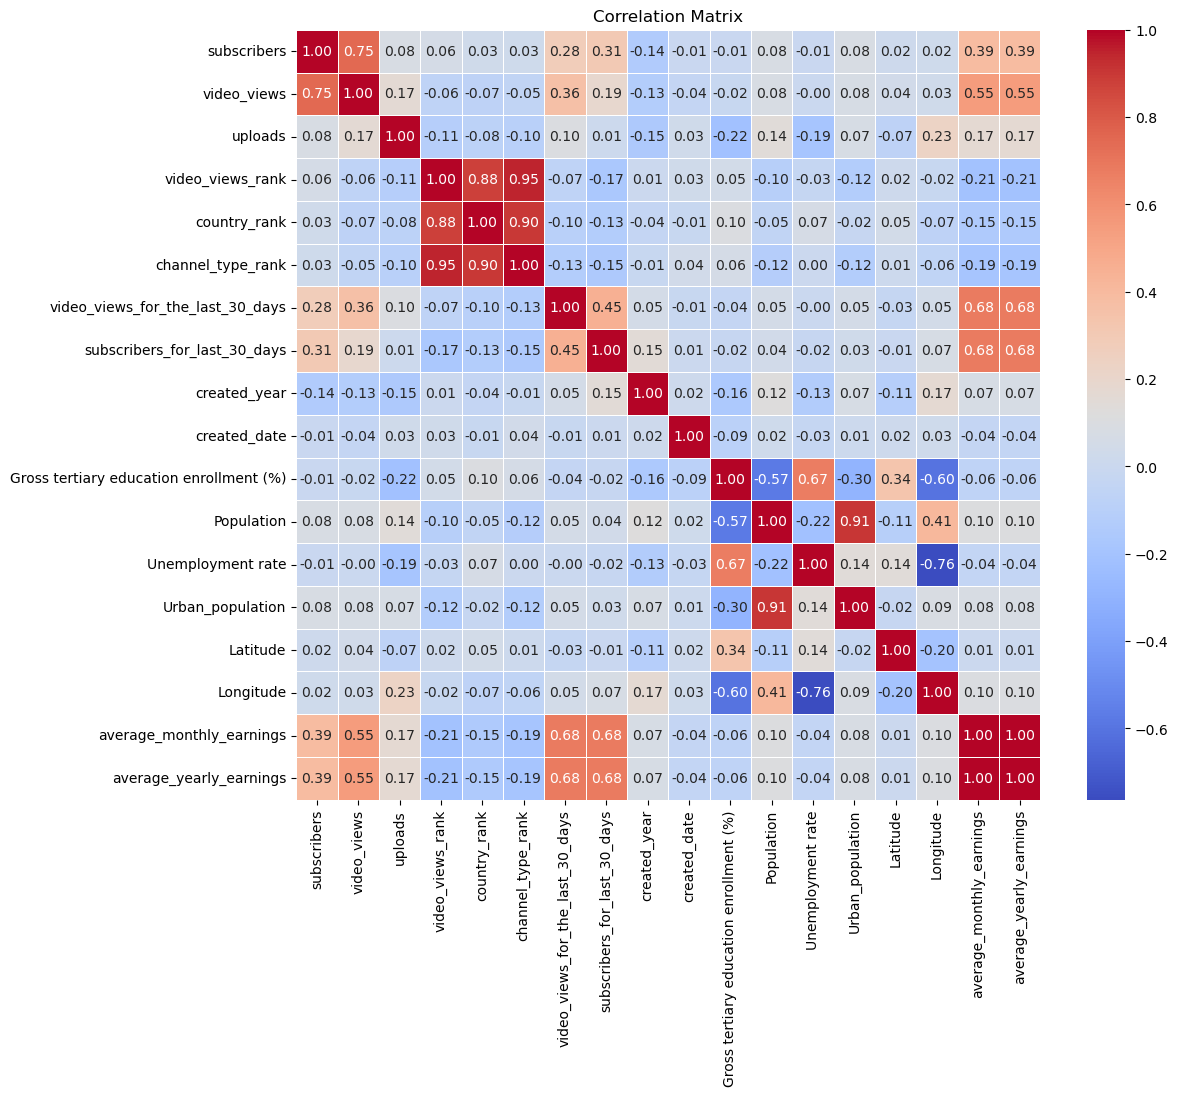

In [342]:
#Correlation with our dependent variable
# Select only numeric columns for correlation analysis
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_df = df[numeric_columns]

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Create a heatmap for visualization
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [343]:
#Correlation with output variable
cor_target = abs(cor["average_monthly_earnings"])
cor_target 

subscribers                                0.388601
video views                                0.551494
uploads                                    0.167262
video_views_rank                           0.208932
country_rank                               0.148960
channel_type_rank                          0.187967
video_views_for_the_last_30_days           0.680293
subscribers_for_last_30_days               0.679681
created_year                               0.072291
created_date                               0.039977
Gross tertiary education enrollment (%)    0.061986
Population                                 0.104787
Unemployment rate                          0.042642
Urban_population                           0.081225
Latitude                                   0.006856
Longitude                                  0.100304
average_monthly_earnings                   1.000000
average_yearly_earnings                    0.999958
Name: average_monthly_earnings, dtype: float64

In [344]:
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.3]
relevant_features

subscribers                         0.388601
video views                         0.551494
video_views_for_the_last_30_days    0.680293
subscribers_for_last_30_days        0.679681
average_monthly_earnings            1.000000
average_yearly_earnings             0.999958
Name: average_monthly_earnings, dtype: float64

In [345]:
# Keeping the most related colums and the categorical columns
columns_to_keep = ['subscribers', 'subscribers_for_last_30_days', 'video views', 'video_views_for_the_last_30_days', 'average_monthly_earnings', 'Country', 'channel_type']
# Drop columns not in the specified list
df = df[columns_to_keep]
df.head()

KeyError: "['video views'] not in index"

In [ ]:
# checking null values
df.isnull().sum()

subscribers                           0
subscribers_for_last_30_days        337
video views                           0
video_views_for_the_last_30_days     56
average_monthly_earnings              0
Country                             122
channel_type                         30
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
subscribers,995.0,2.298241e+07,1.752611e+07,12300000.0,1.450000e+07,1.770000e+07,2.460000e+07,2.450000e+08
subscribers_for_last_30_days,658.0,3.490791e+05,6.143554e+05,1.0,1.000000e+05,2.000000e+05,4.000000e+05,8.000000e+06
video views,995.0,1.103954e+10,1.411084e+10,0.0,4.288145e+09,7.760820e+09,1.355470e+10,2.280000e+11
video_views_for_the_last_30_days,939.0,1.756103e+08,4.163782e+08,1.0,2.013750e+07,6.408500e+07,1.688265e+08,6.589000e+09
average_monthly_earnings,995.0,3.133470e+05,6.102391e+05,0.0,2.310000e+04,1.130000e+05,3.223500e+05,7.225450e+06


#### Handling missing values

In [357]:
#Replacing the missing values in categorical columns  with "Other"
df['Country'].fillna('Other', inplace=True)
df['channel_type'].fillna('Other', inplace=True)

In [358]:
#Replacing missing values of video_views_for_last_30_days with the mode
mode_value = df["video_views_for_the_last_30_days"].mode()[0]
df["video_views_for_the_last_30_days"].fillna(mode_value, inplace=True)

In [359]:
#Replacing missing values of subscribers_for_last_30_days with the mode
mode_value = df["subscribers_for_last_30_days"].mode()[0]
df["subscribers_for_last_30_days"].fillna(mode_value, inplace=True)

In [360]:
# checking null values
df.isnull().sum()

Youtuber                                     0
subscribers                                  0
video_views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                      0
Abbreviation                               122
channel_type                                 0
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days             0
subscribers_for_last_30_days                 0
created_year                                 5
created_month                                5
created_date                                 5
Gross tertiary education enrollment (%)    123
Population                                 123
Unemployment rate                          123
Urban_population                           123
Latitude     

## Model Development

In [361]:
relevant_features = cor_target[cor_target>0.3]
relevant_features

subscribers                         0.388601
video views                         0.551494
video_views_for_the_last_30_days    0.680293
subscribers_for_last_30_days        0.679681
average_monthly_earnings            1.000000
average_yearly_earnings             0.999958
Name: average_monthly_earnings, dtype: float64

In [ ]:
simple_formula = "average_monthly_earnings  ~ video_views_for_the_last_30_days"
simple_model = ols(simple_formula, data=df).fit()
simple_model_summary = simple_model.summary()
print(simple_model_summary)

                               OLS Regression Results                               
Dep. Variable:     average_monthly_earnings   R-squared:                       0.468
Model:                                  OLS   Adj. R-squared:                  0.467
Method:                       Least Squares   F-statistic:                     873.3
Date:                      Tue, 30 Jan 2024   Prob (F-statistic):          3.23e-138
Time:                              16:00:07   Log-Likelihood:                -14352.
No. Observations:                       995   AIC:                         2.871e+04
Df Residuals:                           993   BIC:                         2.872e+04
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

In [ ]:
multiple_formula = 'average_monthly_earnings ~ video_views_for_the_last_30_days + subscribers_for_last_30_days + video_views  + subscribers'
multiple_model = ols(multiple_formula, df).fit()
multiple_model_summary = multiple_model.summary()
print(multiple_model_summary)

                               OLS Regression Results                               
Dep. Variable:     average_monthly_earnings   R-squared:                       0.755
Model:                                  OLS   Adj. R-squared:                  0.754
Method:                       Least Squares   F-statistic:                     762.9
Date:                      Tue, 30 Jan 2024   Prob (F-statistic):          1.46e-300
Time:                              15:59:30   Log-Likelihood:                -13967.
No. Observations:                       995   AIC:                         2.794e+04
Df Residuals:                           990   BIC:                         2.797e+04
Df Model:                                 4                                         
Covariance Type:                  nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

In [362]:
df.isna().sum()



Youtuber                                     0
subscribers                                  0
video_views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                      0
Abbreviation                               122
channel_type                                 0
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days             0
subscribers_for_last_30_days                 0
created_year                                 5
created_month                                5
created_date                                 5
Gross tertiary education enrollment (%)    123
Population                                 123
Unemployment rate                          123
Urban_population                           123
Latitude     

In [372]:
df_vif_copy  = df[['video_views_for_the_last_30_days', 'subscribers_for_last_30_days', 'video_views','subscribers']]



[VIF(df_vif_copy.values, i) for i in range(df_vif_copy.shape[1])]



[1.6965911609658666, 1.7221534492246924, 3.888881834679827, 4.0116455612396305]

In [387]:
trial_formula = "average_monthly_earnings ~ video_views_for_the_last_30_days + subscribers_for_last_30_days + video_views + subscribers"
model_trial = ols(trial_formula, df).fit()

trial_results = model_trial.summary()

print(trial_results)

                               OLS Regression Results                               
Dep. Variable:     average_monthly_earnings   R-squared:                       0.755
Model:                                  OLS   Adj. R-squared:                  0.754
Method:                       Least Squares   F-statistic:                     762.9
Date:                      Tue, 30 Jan 2024   Prob (F-statistic):          1.46e-300
Time:                              16:43:57   Log-Likelihood:                -13967.
No. Observations:                       995   AIC:                         2.794e+04
Df Residuals:                           990   BIC:                         2.797e+04
Df Model:                                 4                                         
Covariance Type:                  nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------